### Maryann Amaefula

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')

In [2]:
df_wine = pd.read_csv('winequality.csv')
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df_wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

### Exploratory Data Analysis

In [7]:
#plt.rcParams['figure.figsize'] = (20.0, 10.0)

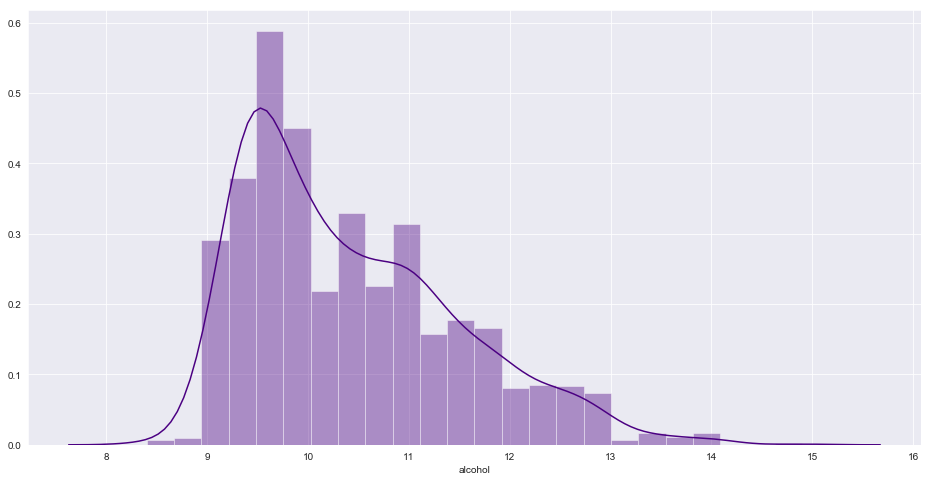

In [8]:
plt.figure(figsize=(16, 8))
sns.distplot(df_wine['alcohol'], color = 'indigo')

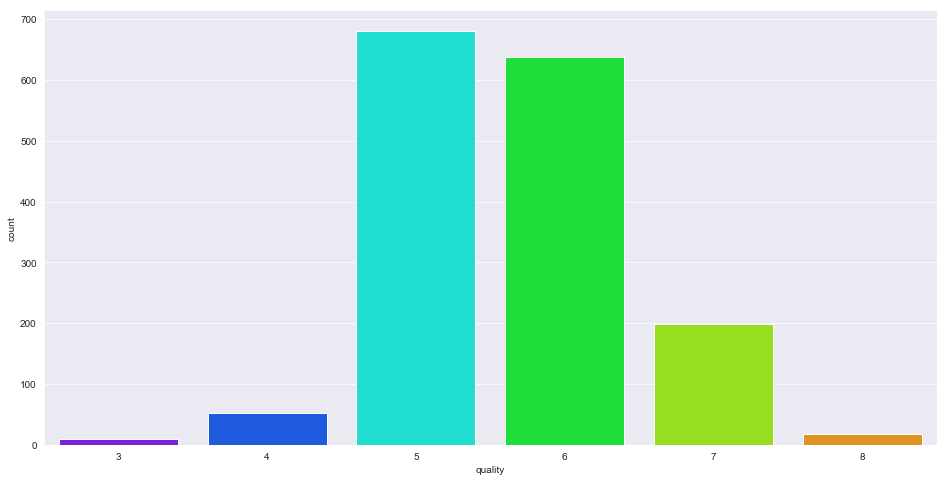

In [9]:
plt.figure(figsize=(16, 8))
sns.countplot(x='quality',data=df_wine, palette = 'gist_rainbow_r');

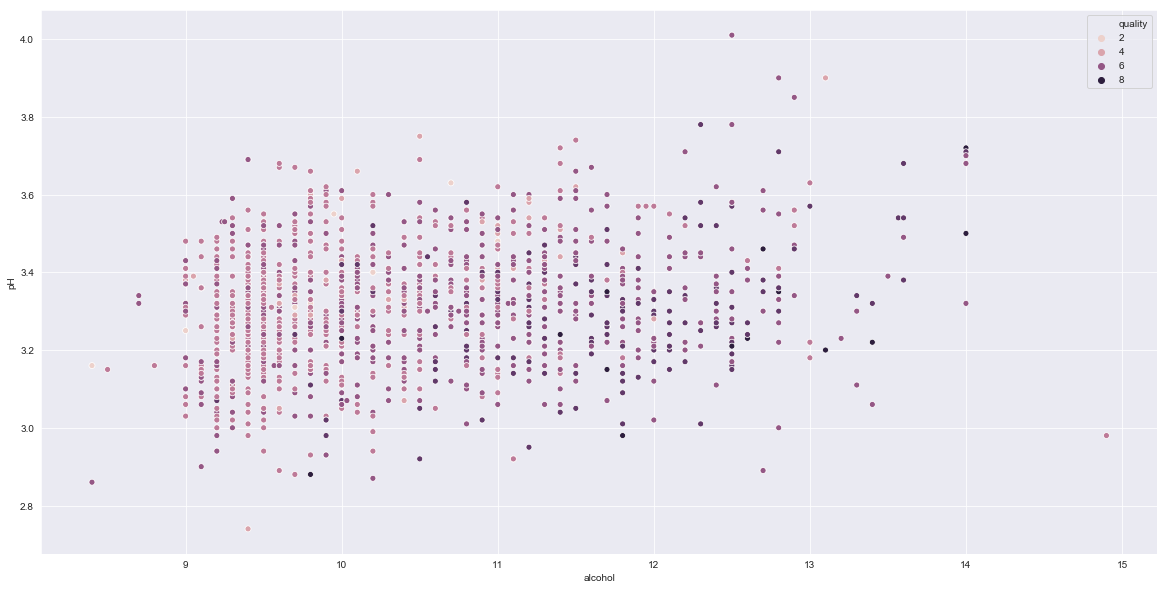

In [10]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)
sns.scatterplot(x="alcohol", y="pH", hue="quality", data=df_wine)

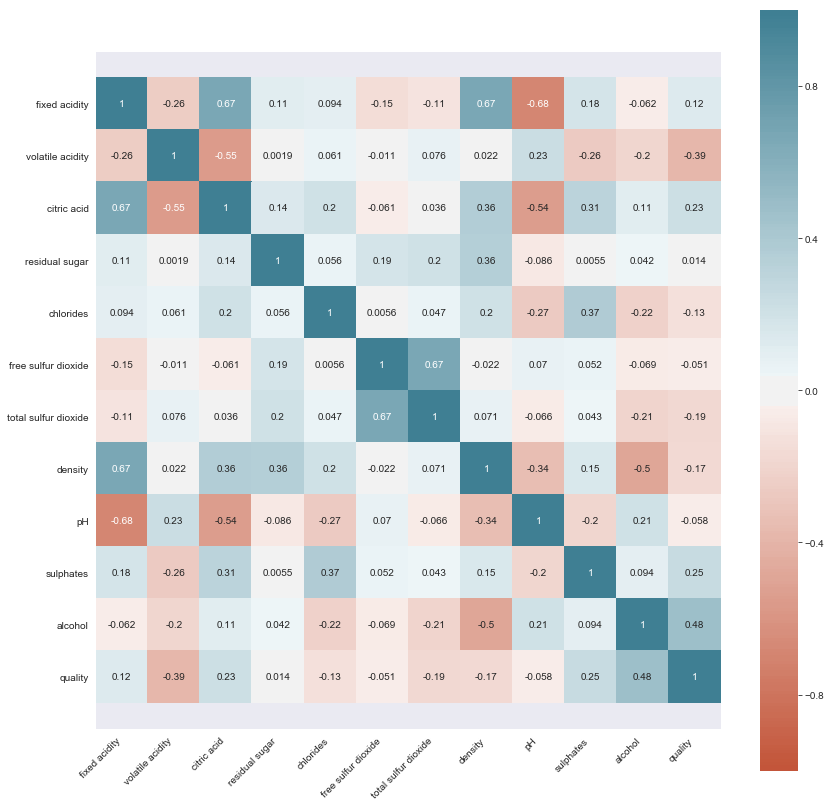

In [11]:
# Correlation of the features

corr = df_wine.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

### Pre-processing

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [13]:
duplicates=df_wine.duplicated()
print(sum(duplicates))

240


In [14]:
# Add feature from column quality
quality = df_wine['quality'].values
category = []

for num in quality:
    if num < 5:
        category.append('low_quality')
    elif num > 6:
        category.append('high_quality')
    else:
        category.append('medium_quality')
        
category = pd.DataFrame(data=category, columns=['category'])
df_new = pd.concat([df_wine, category], axis=1)
df_new.drop(columns='quality', axis=1, inplace=True)
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium_quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,medium_quality
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,medium_quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,medium_quality
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,medium_quality


In [15]:
label_encoder = LabelEncoder()
df_new["category"] = label_encoder.fit_transform(df_new["category"]) 
df_new.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [16]:
categories = list(label_encoder.inverse_transform([0, 1, 2]))
categories

['high_quality', 'low_quality', 'medium_quality']

In [17]:
X = df_new.iloc[: , :-1]
y = df_new.iloc[: , -1]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

### Model

In [19]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.8677390527256479
Accuracy of test: 0.8541666666666666


Bias for training = 1-0.8677390527256479 = 0.13

Bias for test = 1-0.8541666666666666 = 0.14

Variance = test bias - training bias = 0.01

In [20]:
! pip install graphviz

In [21]:
! pip install pydotplus

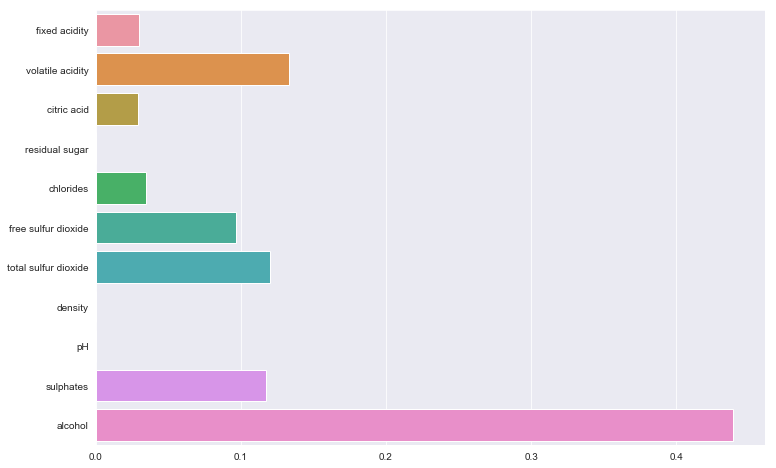

In [22]:
#Feature Importance
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [23]:
importance

array([0.02985515, 0.13309543, 0.02909886, 0.        , 0.03434497,
       0.09676095, 0.12000177, 0.        , 0.        , 0.11755596,
       0.43928689])

In [24]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.66      0.40      0.50        63
           1       0.00      0.00      0.00        18
           2       0.87      0.96      0.92       399

   micro avg       0.85      0.85      0.85       480
   macro avg       0.51      0.45      0.47       480
weighted avg       0.81      0.85      0.83       480



In [25]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.5103035366193261
Recall = 0.4539125591757171
Accuracy = 0.8541666666666666
F1 Score = 0.4705720572057206


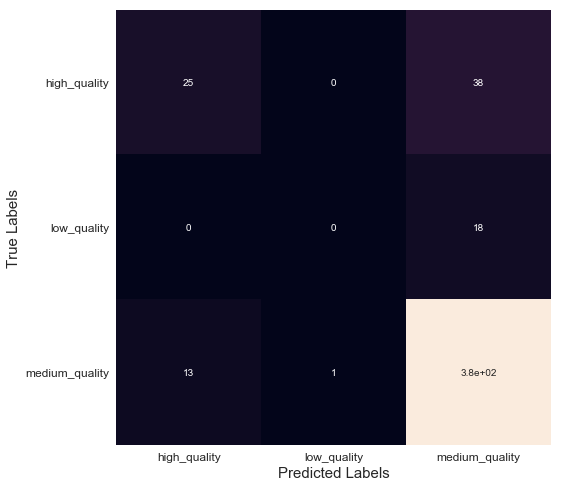

In [26]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

#### Logistic regression

In [27]:
# checking for outliers
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df_new))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.44602073],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.44602073],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.44602073],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.44602073],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.44602073],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.44602073]])

In [28]:
outliers = list(set(np.where(z > 3)[0]))

len(outliers)

141

In [29]:
y.shape

(1599,)

In [30]:
new_df = df_new.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

y_new = y[list(new_df["index"])]
len(y_new).head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,category
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,2
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,2
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,2
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2
5,5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,2
6,6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,2
7,7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,0
8,8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,0
9,9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,2


AttributeError: 'int' object has no attribute 'head'

In [31]:
X_new = new_df.drop('index', axis = 1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
X_scaled = StandardScaler().fit_transform(X_new)
X_scaled

array([[-0.55404532,  1.0387081 , -1.38741253, ..., -0.63538217,
        -0.99657302,  0.44649527],
       [-0.31118983,  2.10132549, -1.38741253, ...,  0.2897715 ,
        -0.60491468,  0.44649527],
       [-0.31118983,  1.39291389, -1.17821377, ...,  0.05848308,
        -0.60491468,  0.44649527],
       ...,
       [-1.22189791, -0.0829436 , -0.70751654, ...,  0.82944447,
         0.57006031,  0.44649527],
       [-1.4647534 ,  0.71401945, -0.75981623, ...,  0.52105991,
        -0.21325635,  0.44649527],
       [-1.40403953, -1.26362959,  1.07067297, ...,  0.13557922,
         0.57006031,  0.44649527]])

In [32]:
categories

['high_quality', 'low_quality', 'medium_quality']

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
from sklearn.model_selection import train_test_split, cross_validate

#Scaling and outlier removed
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3, random_state=42)

models = LogisticRegression(random_state=42, n_jobs=-1)
cv = cross_validate(models,X_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))
print("Test accuracy: {}".format(cv["estimator"][0].score(X_test,y_test)))

Mean training accuracy: 0.9862771481308975
Test accuracy: 0.9908675799086758


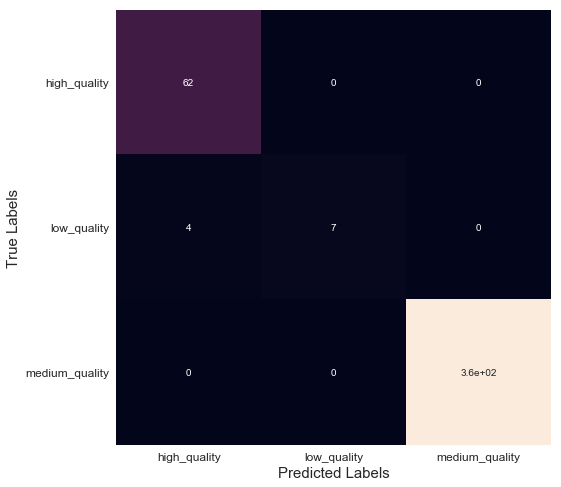

In [35]:
from sklearn.metrics import confusion_matrix
pred = cv["estimator"][0].predict(X_test)

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [36]:
print(classification_report(y_test, cv["estimator"][0].predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        62
           1       1.00      0.64      0.78        11
           2       1.00      1.00      1.00       365

   micro avg       0.99      0.99      0.99       438
   macro avg       0.98      0.88      0.92       438
weighted avg       0.99      0.99      0.99       438



In [37]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

final_model = cv["estimator"][0]

y_pred = final_model.predict(X_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred, average='macro'))
print("Recall:",recall_score(y_test,y_pred, average='macro'))
print("F1 Score:",f1_score(y_test,y_pred, average='macro'))

Accuracy: 0.9908675799086758
Precision: 0.9797979797979798
Recall: 0.8787878787878788
F1 Score: 0.9155092592592592


In [45]:
#! pip install xgboost

In [50]:
# Random forest classification
X = df_new.iloc[: , :-1]
y = df_new.iloc[: , -1]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=123)

In [58]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 600,max_depth=4,random_state=0)
rfc.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.8677390527256479
Accuracy of test: 0.8541666666666666


In [59]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.19      0.31        63
           1       0.00      0.00      0.00        18
           2       0.85      0.99      0.92       399

   micro avg       0.85      0.85      0.85       480
   macro avg       0.55      0.39      0.41       480
weighted avg       0.81      0.85      0.80       480



In [60]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred, average='macro'))
print("Recall:",recall_score(y_test,y_pred, average='macro'))
print("F1 Score:",f1_score(y_test,y_pred, average='macro'))

Accuracy: 0.85
Precision: 0.5505376344086022
Recall: 0.3943191311612364
F1 Score: 0.40811965811965817


In [61]:
categories

['high_quality', 'low_quality', 'medium_quality']

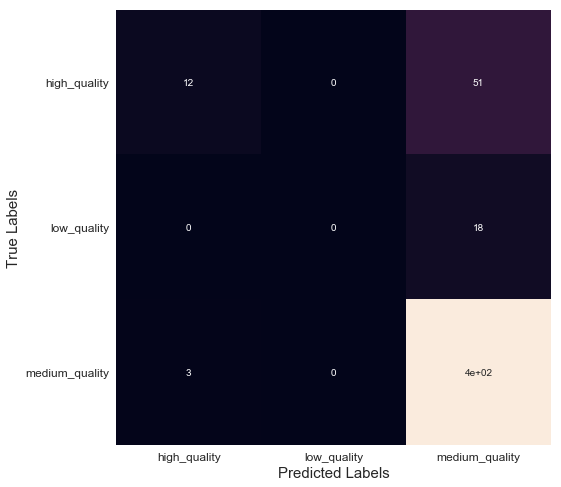

In [63]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

### Evaluation

* From the results of the three models used, the best performing model is the LogisticRegression model.


* LogisticRegression model is the best performing model because of its high Accuracy,it also has a higher precision and F1 score for predicting the quality of wines.


* More feature engineering can be applied to the decision tree model and random forest classifier to better improve the accuracy and  overcome overfitting.